<a href="https://colab.research.google.com/github/Slrosales/Optimizacion_Teamwork/blob/main/Teamwork_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombres:
- Maria Camila Gómez
- Laura Gómez
- Camilo Heras
- Valeria Jiménez
- Brayan Gutiérrez

# Librerias

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Dataframe

In [ ]:
dfPacientes = pd.read_csv('/content/pacientes dataset - dataset.csv')
dfPacientes.head()

,nombre del paciente,edad,indicador vascular,indicador de herencia,riesgo de infarto,riesgo vascular
0,bab18dc2-7792-44be-804b-eee4f6eac53a,19,10.8,1.0,464.984935,RIESGO BAJO
1,bffde512-e0c2-4f07-b397-6303cb940bca,19,6.0,1.4,347.038768,RIESGO BAJO
2,b61767aa-32ea-4eff-a106-7c698e808c35,15,7.8,1.2,351.049738,RIESGO BAJO
3,a3be7c33-a106-48c4-8fd2-ca2ed5444f64,15,6.6,1.1,320.476817,RIESGO BAJO
4,4e9886f7-deea-4de5-b89d-47f436962f9f,17,6.0,1.2,325.977192,RIESGO BAJO


In [ ]:
dfPacientes.columns

Index(['nombre del paciente', 'edad', 'indicador vascular',
       'indicador de herencia', 'riesgo de infarto', 'riesgo vascular'],
      dtype='object')

In [ ]:
dfPacientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266565 entries, 0 to 266564
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   nombre del paciente    266565 non-null  object 
 1   edad                   266565 non-null  int64  
 2   indicador vascular     266565 non-null  float64
 3   indicador de herencia  266565 non-null  float64
 4   riesgo de infarto      266565 non-null  float64
 5   riesgo vascular        266565 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 12.2+ MB


# Modelo 1 - Punto a

In [ ]:
inputs = ['edad', 'indicador vascular']
output = ['riesgo de infarto']

In [ ]:
dfTrain, dfTest = train_test_split(dfPacientes, test_size=.3, random_state=10)

In [ ]:
lr = LinearRegression()
lr.fit(dfTrain[inputs], dfTrain[output])

LinearRegression()

In [ ]:
modelo1_scr = lr.score(dfTest[inputs], dfTest[output])
modelo1_scr

0.9999094134120882

In [ ]:
output1 = lr.predict(dfTest[inputs]).flatten()
output1

array([ 402.98698843,  378.21126526, 1116.97908993, ...,  632.80170575,
        418.44463376,  402.98698843])

In [ ]:
inter1 = lr.intercept_
inter1

array([1.09853026])

In [ ]:
tetas1 = lr.coef_
tetas1

array([[10.22917234, 25.38311951]])

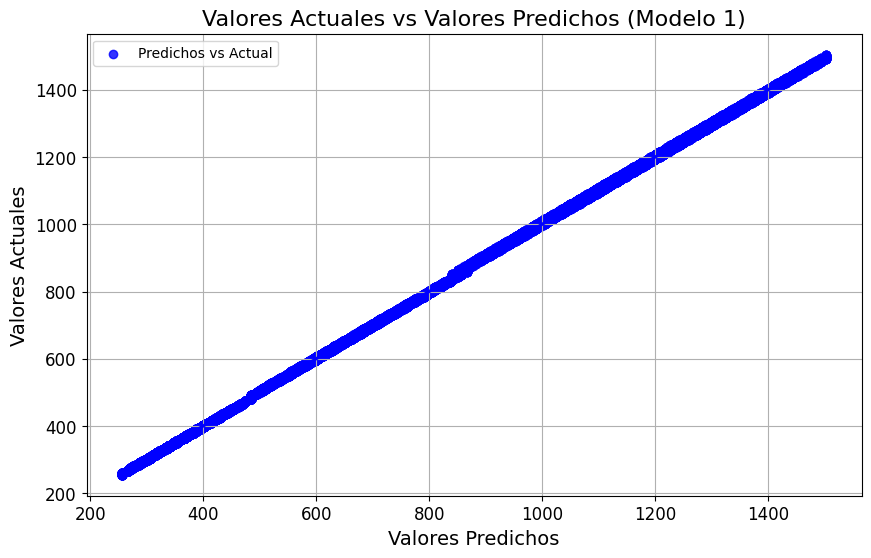

In [ ]:
y_act = dfTest[output].values
y_pred = output1

plt.figure(figsize=(10, 6))
reg_plot = sns.regplot(x=y_pred, y=y_act, color='blue', marker='o')

plt.title('Valores Actuales vs Valores Predichos (Modelo 1)', fontsize=16)
plt.xlabel('Valores Predichos', fontsize=14)
plt.ylabel('Valores Actuales', fontsize=14)

reg_plot.legend(['Predichos vs Actual'])
plt.grid(True)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


# Modelo 2 - Punto b

In [ ]:
inputs = ['edad', 'indicador vascular', "indicador de herencia"]
output = ['riesgo de infarto']

In [ ]:
dfTrain, dfTest = train_test_split(dfPacientes, test_size=.3, random_state=10)

In [ ]:
lr = LinearRegression()
lr.fit(dfTrain[inputs], dfTrain[output])

LinearRegression()

In [ ]:
modelo2_scr = lr.score(dfTest[inputs], dfTest[output])
modelo2_scr

0.9999999764063566

In [ ]:
output2 = lr.predict(dfTest[inputs]).flatten()
output2

array([ 401.49976889,  375.00015459, 1115.5005046 , ...,  631.50015836,
        416.99986219,  402.49973954])

In [ ]:
inter2 = lr.intercept_
inter2

array([-0.00015511])

In [ ]:
tetas2 = lr.coef_
tetas2

array([[10.00003186, 24.99997933,  4.99985327]])

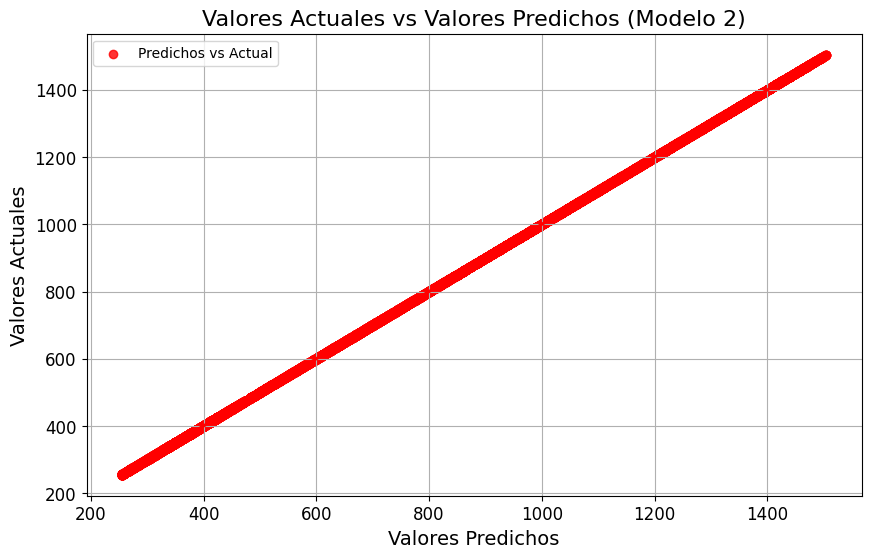

In [ ]:
y_act = dfTest[output].values
y_pred = output2

plt.figure(figsize=(10, 6))
reg_plot = sns.regplot(x=y_pred, y=y_act, color='red', marker='o')

plt.title('Valores Actuales vs Valores Predichos (Modelo 2)', fontsize=16)
plt.xlabel('Valores Predichos', fontsize=14)
plt.ylabel('Valores Actuales', fontsize=14)

reg_plot.legend(['Predichos vs Actual'])
plt.grid(True)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

# Conclusiones

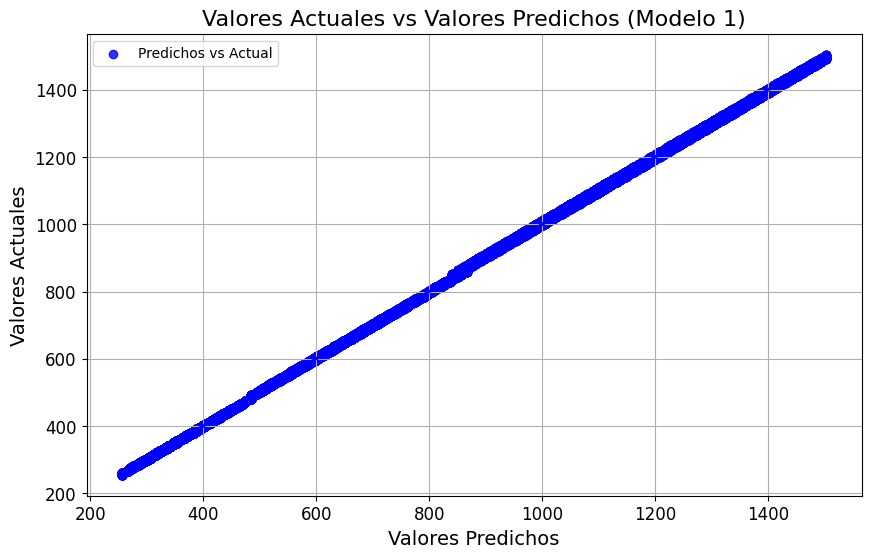

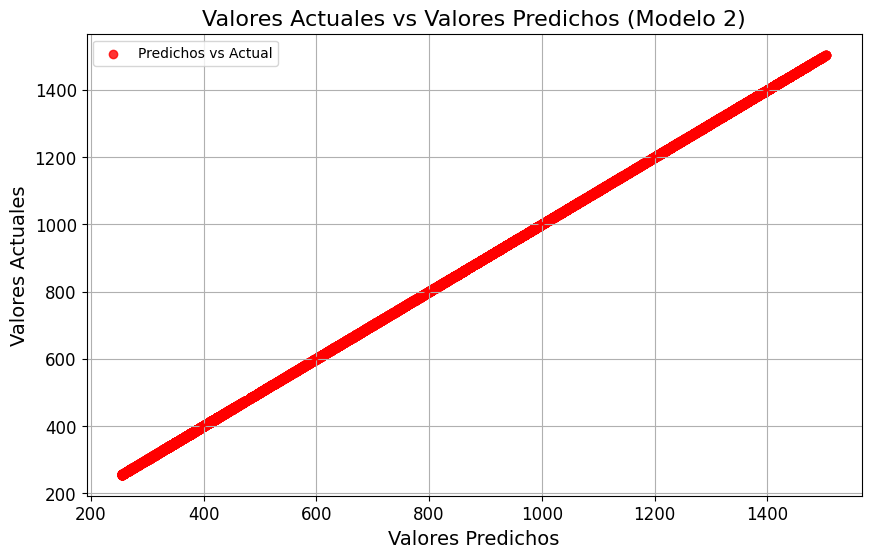





---





Ambos modelos tienen alta precisión, pero se resalta que en el segundo  el Score da un valor más cercano a 1 y teniendo en cuenta que el Score es la pendiente de la linea que ajusta las predicciones con fundamento a los valores reales sea mas cercano a 1 (es decir, desempeño ideal) demuestra que tiene una mejor predicción.

Además, el segundo modelo muestra una mayor precisión, ya que el intercepto es más cercano a 0, tiene menos sesgo, es decir que las variables de entrada están capturando mayoritariamente lo que se quiere predecir. Por lo tanto podemos concluir que el segundo modelo es mejor para predecir el riesgo de infarto.

| Modelo | Score                 | Intercepto    | Parámetros                   |
|-------|-----------------------|--------------|------------------------------|
| 1     | 0.9999094134120882    | 1.09853026   | 10.22917234, 25.38311951     |
| 2     | 0.9999999764063566    | -0.00015511  | 10.00003186, 24.99997933, 4.99985327 |
